# Group 2 Capstone Project

#### Import nessecary files

In [1]:
#! pip uninstall scikit-learn --yes
#! pip uninstall imblearn --yes
#! pip install scikit-learn==1.2.2
#! pip install imblearn

In [38]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from collections import Counter
import imblearn

#### Read in dataset

https://www.kaggle.com/datasets/willianoliveiragibin/websites-e-comerce

E-commerce data set with columns: 'accessed_date', 'duration_(secs)', 'network_protocol', 'ip', 'bytes', 'accessed_Ffom', 'age', 'gender', 'country', 'membership', 'language','sales', 'returned_amount', 'pay_method' with target variable being 'returned'

In [2]:
#read
df = pd.read_csv("E-commerce Website Logs new.csv")
df.head()

C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method
0,2017-03-14 17:43:57.172,2533,TCP,1.10.195.126,20100,Chrome,28,Female,CA,Normal,English,261.96,No,0,Credit Card
1,2017-03-14 17:43:57.172,4034,TCP,1.1.217.211,20500,Mozilla Firefox,21,Male,AR,Normal,English,731.94,No,0,Debit Card
2,2017-03-14 17:43:26.135,1525,TCP,1.115.198.107,90100,Mozilla Firefox,20,Male,PL,Normal,English,14.62,No,0,Cash
3,2017-03-14 17:43:26.135,4572,TCP,1.121.152.143,100300,Mozilla Firefox,66,Female,IN,Normal,Spanish,9.575.775,No,0,Credit Card
4,2017-03-14 18:17:09.005,3652,TCP,1.123.135.213,270200,Mozilla Firefox,53,Female,KR,Normal,Spanish,22.368,No,0,Cash


### Data Pre-processing

First, we went into the dataset and understood what each of the columns could contribute to our buisness problem. After thoroughly looking thorugh our options, we decided to drop 'network_protocol', 'ip', 'bytes', 'sales', and 'returned_amount'. The column 'network_protocol' didn't seem like a feature that would provide any useful information to our buisness problem as it does not give insght to any kind of marketing strategy or promotions. The column 'ip' only give a unique value for each data point and that would not be very useful for a model. The column 'bytes' was not defined when we were researching our dataset, thus we were not sure what the values represented whether it be the amount of bytes the customer was using when accessing the website or when purchasing the product, etc. so we deemed it so to remove this column as well. The columns 'sales' and 'returned_amount' are types of target variables that we had the choice of using, but decided against it. Since these columns are directly related to our target variable, wherein a 0 in sales can easily predict that the item was returned and a 0 in returned amount would predict the item is not returned, it would not provide our mode with useful information, thus we removed them.

In [3]:
#start prep
df.drop(['network_protocol', 'ip', 'bytes', 'sales', 'returned_amount'], axis=1, inplace=True)
df.head()

,accessed_date,duration_(secs),accessed_Ffom,age,gender,country,membership,language,returned,pay_method
0,2017-03-14 17:43:57.172,2533,Chrome,28,Female,CA,Normal,English,No,Credit Card
1,2017-03-14 17:43:57.172,4034,Mozilla Firefox,21,Male,AR,Normal,English,No,Debit Card
2,2017-03-14 17:43:26.135,1525,Mozilla Firefox,20,Male,PL,Normal,English,No,Cash
3,2017-03-14 17:43:26.135,4572,Mozilla Firefox,66,Female,IN,Normal,Spanish,No,Credit Card
4,2017-03-14 18:17:09.005,3652,Mozilla Firefox,53,Female,KR,Normal,Spanish,No,Cash


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172838 entries, 0 to 172837
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   accessed_date    172838 non-null  object
 1   duration_(secs)  172838 non-null  int64 
 2   accessed_Ffom    172838 non-null  object
 3   age              172838 non-null  object
 4   gender           172838 non-null  object
 5   country          172838 non-null  object
 6   membership       172838 non-null  object
 7   language         172838 non-null  object
 8   returned         172838 non-null  object
 9   pay_method       172838 non-null  object
dtypes: int64(1), object(9)
memory usage: 13.2+ MB


We can see that there are no null values detected from our initial search of finding them. We wanted to make sure that there were no place holders within each of the columns.

##### 1. Age and Gender column

When looking into the age column, we saw that there were placeholder values that represented null items. For some reason there were 2 kinds of 0s and then dashed lines. However, almost 50% of our data consists of these placeholder values which makes it difficult on deciding what to do with these values. We decided on just removing the those values as it was a way not to skew the data because replacing the mean, median, or mode in those values would just make an our model more biased to that value in the age feature. Additionally, since we still have a decent amount of data to use even after removing those data points, we will tset with the data that was left over and if the metrics point to having a better model with more data point then we may return to these data points and add them in. Furthermore, when researching with this column, we also learned that any unknown genders/ place holder values for the gender column was removed whenever we removed all the unknown ages. Since we are working with the data set without the unknown ages, we can skip identifying any unknown values in the gender column.

In [5]:
df['age'].value_counts(normalize=True)

0     0.241648
0     0.182917
--    0.085300
37    0.010247
22    0.010108
43    0.009905
51    0.009882
64    0.009876
24    0.009836
30    0.009824
40    0.009784
48    0.009732
61    0.009685
39    0.009628
27    0.009610
52    0.009604
38    0.009570
19    0.009564
28    0.009552
42    0.009518
41    0.009512
56    0.009494
67    0.009442
21    0.009442
26    0.009425
57    0.009425
62    0.009419
36    0.009408
46    0.009396
68    0.009396
33    0.009379
53    0.009350
69    0.009327
58    0.009321
25    0.009309
29    0.009298
50    0.009292
32    0.009286
34    0.009275
31    0.009263
49    0.009257
59    0.009251
66    0.009251
47    0.009234
44    0.009217
23    0.009217
63    0.009153
60    0.009124
20    0.009072
54    0.009066
45    0.009037
35    0.008985
65    0.008980
55    0.008968
18    0.008939
Name: age, dtype: float64

In [6]:
#remove non-integer values
df = df[df['age']!="--"] 

In [7]:
#turn age into integer
df['age'] = df['age'].astype('int64')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158095 entries, 0 to 172837
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   accessed_date    158095 non-null  object
 1   duration_(secs)  158095 non-null  int64 
 2   accessed_Ffom    158095 non-null  object
 3   age              158095 non-null  int64 
 4   gender           158095 non-null  object
 5   country          158095 non-null  object
 6   membership       158095 non-null  object
 7   language         158095 non-null  object
 8   returned         158095 non-null  object
 9   pay_method       158095 non-null  object
dtypes: int64(2), object(8)
memory usage: 13.3+ MB


In [9]:
df['age'].value_counts(normalize=True)

0     0.464158
37    0.011202
22    0.011050
43    0.010829
51    0.010804
64    0.010797
24    0.010753
30    0.010740
40    0.010696
48    0.010639
61    0.010589
39    0.010525
27    0.010506
52    0.010500
38    0.010462
19    0.010456
28    0.010443
42    0.010405
41    0.010399
56    0.010380
67    0.010323
21    0.010323
26    0.010304
57    0.010304
62    0.010298
36    0.010285
46    0.010272
68    0.010272
33    0.010253
53    0.010222
69    0.010196
58    0.010190
25    0.010177
29    0.010165
50    0.010158
32    0.010152
34    0.010139
31    0.010127
49    0.010120
59    0.010114
66    0.010114
47    0.010095
44    0.010076
23    0.010076
63    0.010007
60    0.009975
20    0.009918
54    0.009912
45    0.009880
35    0.009823
65    0.009817
55    0.009804
18    0.009773
Name: age, dtype: float64

In [10]:
df['gender'].value_counts()

Female     93903
Male       63049
Unknown     1143
Name: gender, dtype: int64

In [11]:
#remove placeholders
df = df[df['age']!=0]

In [12]:
df['age'].value_counts()

37    1771
22    1747
43    1712
51    1708
64    1707
24    1700
30    1698
40    1691
48    1682
61    1674
39    1664
27    1661
52    1660
38    1654
19    1653
28    1651
42    1645
41    1644
56    1641
21    1632
67    1632
26    1629
57    1629
62    1628
36    1626
68    1624
46    1624
33    1621
53    1616
69    1612
58    1611
25    1609
29    1607
50    1606
32    1605
34    1603
31    1601
49    1600
59    1599
66    1599
47    1596
44    1593
23    1593
63    1582
60    1577
20    1568
54    1567
45    1562
35    1553
65    1552
55    1550
18    1545
Name: age, dtype: int64

In [13]:
df['gender'].value_counts()

Female    50682
Male      34032
Name: gender, dtype: int64

##### 2. Payment Method column

No need to deal with null, duplicates, or outliers

In [14]:
df['pay_method'].value_counts()

Cash           35625
Credit Card    25962
Debit Card     13507
Others          9620
Name: pay_method, dtype: int64

##### 3. Membership Column

No need to deal with null, duplicates, or outliers. One thing to note is that when the 0 valued Age is removed, the Not Logged In membership class is removed, leaving only the normal and premium classes for the model

In [15]:
df['membership'].value_counts()

Premium    54847
Normal     29867
Name: membership, dtype: int64

##### 4. Language column

There are duplicates that we need to categorize together. There are no null values to address or any outliers.

In [16]:
df['language'].value_counts()

English       49939
Chinese       10172
Spanish        7124
Russian        6013
French         3972
Italian        3359
German          955
Japanese        599
persian         400
Thai            361
Dutch           288
italian         284
Portuguese      199
Arabic          186
polish          123
mongolian       114
malayalam        95
swahili          72
nepali           71
swedish          71
norwegian        58
Slovak           48
slovene          44
urdu             39
romanian         36
malay            30
macedonian       24
serbian          14
tegulu           13
marathi          11
Name: language, dtype: int64

##### 5. Accessed_from column

There are duplicates that we need to categorize together. There are no null values to address or any outliers.

In [17]:
df['accessed_Ffom'].value_counts()

Android App        18768
Chrome             13818
Mozilla Firefox    13015
Others             13007
IOS App            10627
Safari              8082
Microsoft Edge      7325
SafFRi                72
Name: accessed_Ffom, dtype: int64

##### 6. Country column

No need to deal with null, duplicates, or outliers

In [18]:
df['country'].value_counts()

IT    16892
US    14611
CA     8695
CN     4988
JP     4885
RU     4661
CH     4060
IN     3942
PL     3276
GB     2443
AT     2342
AU     2227
SE     2210
NO     1819
AR     1581
DE     1064
KR     1060
PR      850
CO      735
ZA      621
MX      528
PE      519
FI      323
DK      110
IE      109
AE      108
FR       55
Name: country, dtype: int64

##### 7. Target variable

The thing that needs to be addressed with the target variable is the idea of an unbalanced data set. There is only about 15% of the data that contains customers that returned an item. Therefore, we need to test with different sampling techniques (under/over) to gte the dataset more balanced to have a better outcome with the metrics of modeling.

In [19]:
df['returned'].value_counts(normalize=True)

No     0.853944
Yes    0.146056
Name: returned, dtype: float64

## Duplicate Handling

In [20]:
# Combine rows with 'Safari' and 'SafFRi'
df.loc[df['accessed_Ffom'] == 'SafFRi', 'accessed_Ffom'] = 'Safari'

# Check the updated 'accessed_Ffom' column
print("Updated accessed_Ffom:")
print(df['accessed_Ffom'].value_counts())

Updated accessed_Ffom:
Android App        18768
Chrome             13818
Mozilla Firefox    13015
Others             13007
IOS App            10627
Safari              8154
Microsoft Edge      7325
Name: accessed_Ffom, dtype: int64


In [21]:
# Capitalizing the first letter of each word
df['language'] = df['language'].str.split().str[0].str.capitalize()
print(df['language'].value_counts())

English       49939
Chinese       10172
Spanish        7124
Russian        6013
French         3972
Italian        3643
German          955
Japanese        599
Persian         400
Thai            361
Dutch           288
Portuguese      199
Arabic          186
Polish          123
Mongolian       114
Malayalam        95
Swahili          72
Swedish          71
Nepali           71
Norwegian        58
Slovak           48
Slovene          44
Urdu             39
Romanian         36
Malay            30
Macedonian       24
Serbian          14
Tegulu           13
Marathi          11
Name: language, dtype: int64


## Category Encoding

In [22]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['returned'] = le.fit_transform(df['returned'])

In [23]:
encoded_columns = ['accessed_Ffom', 'country', 'membership', 'language', 'pay_method']
ohe = pd.get_dummies(df[encoded_columns],prefix=encoded_columns, drop_first=True)
df_encoded = pd.concat([df, ohe], axis=1)
df_encoded = df_encoded.drop(encoded_columns,axis=1)

In [24]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84714 entries, 0 to 99456
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   accessed_date                  84714 non-null  object
 1   duration_(secs)                84714 non-null  int64 
 2   age                            84714 non-null  int64 
 3   gender                         84714 non-null  int32 
 4   returned                       84714 non-null  int32 
 5   accessed_Ffom_Chrome           84714 non-null  uint8 
 6   accessed_Ffom_IOS App          84714 non-null  uint8 
 7   accessed_Ffom_Microsoft Edge   84714 non-null  uint8 
 8   accessed_Ffom_Mozilla Firefox  84714 non-null  uint8 
 9   accessed_Ffom_Others           84714 non-null  uint8 
 10  accessed_Ffom_Safari           84714 non-null  uint8 
 11  country_AR                     84714 non-null  uint8 
 12  country_AT                     84714 non-null  uint8 
 13  c

## Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop(["returned","accessed_date","duration_(secs)"], axis=1)
y = df_encoded.returned
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Undersampling and Oversampling for Imbalanced Data

In [26]:
print(Counter(y))

Counter({0: 72341, 1: 12373})


In [27]:
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority', random_state=42) #This means that if the majority class had 1,000 examples and the minority class had 100, 
                                                             # this strategy would oversampling the minority class so that it has 1,000 examples.

Xo_train, yo_train = oversample.fit_resample(X_train, y_train)
print(Counter(yo_train))

Counter({0: 54288, 1: 54288})


In [28]:
from imblearn.under_sampling import RandomUnderSampler

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=42)
# fit and apply the transform
Xu_train, yu_train = undersample.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(yu_train))

Counter({0: 9247, 1: 9247})


## Model 1: Logistic Regression

#### Using Oversampled Set

In [30]:
#try 2 fits for this model one for over, one for under
logrego = LogisticRegression(random_state=0) #max_iter=175) # remove warning
logrego.fit(Xo_train, yo_train)

LogisticRegression(random_state=0)

In [31]:
logrego.score(Xo_train, yo_train) #train model score

0.5394746536987917

In [32]:
logrego.score(X_test, y_test) #unseen realistic data (bias)

0.4079512724868974

In [33]:
logrego.score(Xu_train, yu_train) #testing on undersampling set using the oversampling sets trained model

0.5418514112685195

In [34]:
logrego.score(X,y)

0.40949547890549376

#### Using Undersampled Set

In [35]:
logregu = LogisticRegression(random_state=0)
logregu.fit(Xu_train, yu_train)

C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [36]:
logrego.score(Xu_train, yu_train) #train model score

0.5418514112685195

In [37]:
logregu.score(X_test, y_test) #unseen realistic data (bias)

0.3966192926955947

In [38]:
logregu.score(Xo_train, yo_train) #testing on oversampling set using the undersampling sets trained model

0.5341051429413498

In [39]:
logregu.score(X, y)

0.39911938994735224

### Grid Search

In [40]:
logreg = LogisticRegression(random_state=0)
grid={"solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], "C":np.logspace(-3,3,7)}
search = GridSearchCV(logreg, grid, cv=10, scoring='accuracy')

#### Using Oversampled Set

In [41]:
search.fit(Xo_train, yo_train)

C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The 

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=0),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [42]:
search.best_score_ #accuary of best model

0.5362971802439906

In [43]:
search.best_params_ #params used to get best model

{'C': 1.0, 'solver': 'liblinear'}

In [44]:
search.best_estimator_

LogisticRegression(random_state=0, solver='liblinear')

In [45]:
logrego2 = LogisticRegression(solver='liblinear', random_state=0)

In [46]:
logrego2.fit(Xo_train, yo_train)

LogisticRegression(random_state=0, solver='liblinear')

In [47]:
logrego2.score(Xo_train, yo_train)

0.5385720601237842

In [48]:
logrego2.score(X_test, y_test)

0.4070069408376222

In [49]:
logrego2.score(Xu_train, yu_train)

0.5405536930896507

In [50]:
logrego2.score(X, y)

0.4082796232027764

#### Using Undersampled Set

In [51]:
search.fit(Xu_train, yu_train)

C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\LESAM\A

C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\LESAM\A

C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\LESAM\A

C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\LESAM\A

C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\LESAM\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\LESAM\A

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=0),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [52]:
search.best_score_ #accuracy of best model

0.5333629280984609

In [53]:
search.best_params_ #parameters used to get the best model

{'C': 0.1, 'solver': 'liblinear'}

Now we try using the best hyperparameter settings for the undersampled set

In [54]:
logregu2 = LogisticRegression(C=0.1, solver='liblinear', random_state=0)
logregu2.fit(Xu_train, yu_train)
logregu2.score(Xu_train, yu_train)

0.543852060127609

In [55]:
logregu2.score(X_test, y_test)

0.39595826054110206

In [56]:
logregu2.score(Xo_train, yo_train)

0.5349524756852343

In [57]:
logregu2.score(X, y)

0.3998158509809477

## Model 2: Random Forest

#### Using Oversampled Set

In [58]:
clfo = RandomForestClassifier(random_state=0)
clfo.fit(Xo_train, yo_train)

RandomForestClassifier(random_state=0)

In [59]:
clfo.score(Xo_train, yo_train) #trained model score

0.9587017388741527

In [60]:
clfo.score(X_test, y_test) #unseen data

0.7395061145474291

In [61]:
clfo.score(Xu_train, yu_train) #testing on undersampling set using the oversampling sets trained model

0.9572293716881151

In [62]:
clfo.score(X,y)

0.8839152914512359

Random Forest model trained using the oversampled set is better than Logistic regression

#### Using Undersampled Set

In [63]:
clfu = RandomForestClassifier(random_state=0)
clfu.fit(Xu_train, yu_train)

RandomForestClassifier(random_state=0)

In [64]:
clfu.score(Xu_train, yu_train) #trained model score

0.9636638909916729

In [65]:
clfu.score(X_test, y_test) #unseen data score

0.5190046744416639

In [66]:
clfu.score(Xo_train, yo_train) #testing on oversampling set using the undersampling sets trained model

0.7799053197760094

In [67]:
clfu.score(X,y)

0.6160847085487641

There is possible overfitting case here due to the testing scores being lower and the training scores being so good

### Grid Search

In [68]:
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_depth': [10, 15, 20, 25]
}

In [69]:
clf = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(clf, param_grid=param_grid)

#### Using Oversampled Set

In [70]:
grid_search.fit(Xo_train, yo_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=25, n_estimators=150, random_state=0)


In [71]:
clf_grid = RandomForestClassifier(max_depth=25, n_estimators=150, random_state=0) #max_features= None, n_estimators=25
clf_grid.fit(Xo_train, yo_train) 
clf_grid.score(Xo_train, yo_train) #trained model score

0.9494731800766284

In [72]:
clf_grid.score(X_test, y_test) #unseen data score (bias)

0.7262854714575759

In [73]:
clf_grid.score(Xu_train, yu_train) #testing on undersampling set using the oversampling sets trained model

0.9481994160268196

In [74]:
clf_grid.score(X, y)

0.8710602733904668

#### Using Undersampled Set

In [75]:
grid_search.fit(Xu_train, yu_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=15, n_estimators=25, random_state=0)


In [76]:
clf_grid = RandomForestClassifier(max_depth=15, n_estimators=25, random_state=0) #max_features= None, n_estimators=25
clf_grid.fit(Xu_train, yu_train) 
clf_grid.score(Xu_train, yu_train) #trained model score

0.7617605709959987

In [77]:
clf_grid.score(X_test, y_test) #unseen data score

0.4654138533452949

In [78]:
clf_grid.score(Xo_train, yo_train) #testing on oversampling set using the undersampling sets trained model

0.6583959622752726

In [79]:
clf_grid.score(X, y)

0.5188516656042684

## Model 3: MLP Classifier (NN)

In [13]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(random_state=1, max_iter=300).fit(Xo_train, yo_train)
nn.score(X_test, y_test)

0.526700977383257

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']
}

## Final Model Picks

Due to how the scores were, using over sampling helps the model have more data to train on and the model that produced the best scores was the random forest model (with or without specific hyperparameters does not have a significant effect)

In [29]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
# Use oversampling
clf_grid = RandomForestClassifier(max_depth=25, n_estimators=150, random_state=0) #max_features= None, n_estimators=25
clf_grid.fit(Xo_train, yo_train) 
clf_grid.score(Xo_train, yo_train) #trained model score

0.9494731800766284

In [31]:
clf_grid.score(X_test, y_test) #unseen data

0.7262854714575759

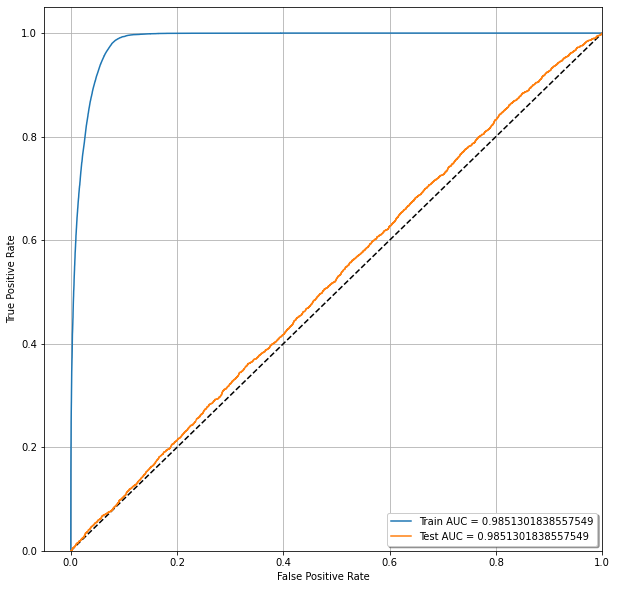

In [32]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# overall accuracy
acc = clf_grid.score(X_test,y_test)

# get roc/auc info
Y_score = clf_grid.predict_proba(Xo_train)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(yo_train, Y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

Yt_score = clf_grid.predict_proba(X_test)[:,1]
fprt = dict()
tprt = dict()
fprt, tprt, _ = roc_curve(y_test, Yt_score)

roc_auct = dict()
roc_auct = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='Train AUC = {0}'.format(roc_auc))  
plt.plot(fprt, tprt, label='Test AUC = {0}'.format(roc_auct))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

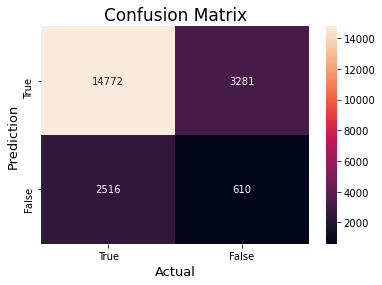

In [39]:
y_hat = clf_grid.predict(X_test)
cm = confusion_matrix(y_test, y_hat)

sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['True','False'],
            yticklabels=['True','False'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

#cm = confusion_matrix(y.argmax(axis=1), y_hat.argmax(axis=1)) 

In [84]:
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf_grid, X, y, cv = k_folds)

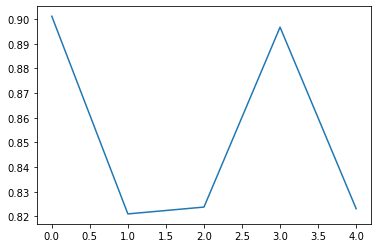

In [85]:
plt.plot(scores)

## Feature Importance

This is showing the coefficients of each of the columns/ features we have in our data set. It gives us information about how important the feature is to our target variable.

In [86]:
clf_grid.feature_names_in_

AttributeError: 'RandomForestClassifier' object has no attribute 'feature_names_in_'

In [ ]:
clf_grid.feature_importances_

In [ ]:
feat_importances = pd.Series(clf_grid.feature_importances_, index=Xo_train.columns)
feat_importances.nlargest(10).plot(kind='barh') #shows top nlargest important features

Age, gender, and the type of memebership seem to be the most important fearures that affect whether or not a customer returns a product or not. We should look into these more to find out informtaion how to use this data for our business scope